In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
#set visual style for seaborn
sns.set_theme(style="whitegrid")

# Load the dataset

processed_data_path = r"C:\Users\pcric\Desktop\SPRING 2025\PRACTICAL DATASCIENCE\Loan_Default_Prediction\Loan_Default_Prediction\data\processed\cleaned_loans.csv"
#load the dataset
df=pd.read_csv(processed_data_path)


#Display the dataset info
print("Data Info")
print(df.info())


Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  float64
 3   home_ownership       32586 non-null  object 
 4   employment_duration  32586 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  float64
 8   loan_int_rate        32586 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   32586 non-null  float64
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32586 non-null  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 3.2+ MB
None


In [6]:
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000.0,RENT,123.0,PERSONAL,C,35000.0,16.02,10,0.0,3,1.0
1,2.0,21,9600.0,OWN,5.0,EDUCATION,A,1000.0,11.14,1,0.0,2,0.0
2,3.0,25,9600.0,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,0.0,3,1.0
3,4.0,23,65500.0,RENT,4.0,MEDICAL,B,35000.0,15.23,10,0.0,2,1.0
4,5.0,24,54400.0,RENT,8.0,MEDICAL,B,35000.0,14.27,10,0.0,4,1.0


Check for Missing Values & Basic Stats

In [7]:
missing_values = df.isnull().sum()
print("missing_values : " + str(missing_values))

missing_values : customer_id            3
customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              1
loan_int_rate          0
term_years             0
historical_default     0
cred_hist_length       0
Current_loan_status    0
dtype: int64


In [8]:
# Fill missing loan amount with the median
df = df.assign(loan_amnt=df['loan_amnt'].fillna(df['loan_amnt'].median()))

# Verify if missing values are handled
print("Missing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
customer_id            3
customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate          0
term_years             0
historical_default     0
cred_hist_length       0
Current_loan_status    0
dtype: int64


In [9]:
#Summary statistics
print("Summary statistics")
df.describe()

Summary statistics


,customer_id,customer_age,customer_income,employment_duration,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
count,32583.000000,32586.000000,3.258600e+04,32586.000000,3.258600e+04,32586.000000,32586.000000,32586.0,32586.000000,32586.000000
mean,16289.497806,27.732769,6.607637e+04,4.768459,9.756193e+03,11.009492,4.761738,0.0,5.804026,0.209906
std,9405.919628,6.360528,6.198029e+04,4.087496,2.177152e+04,3.081618,2.471107,0.0,4.055078,0.407248
min,1.000000,3.000000,4.000000e+03,0.000000,5.000000e+02,5.420000,1.000000,0.0,2.000000,0.000000
25%,8144.500000,23.000000,3.850000e+04,2.000000,5.000000e+03,8.490000,3.000000,0.0,3.000000,0.000000
50%,16288.000000,26.000000,5.500000e+04,4.000000,8.000000e+03,10.990000,4.000000,0.0,4.000000,0.000000
75%,24433.500000,30.000000,7.920000e+04,7.000000,1.220000e+04,13.110000,7.000000,0.0,8.000000,0.000000
max,32581.000000,144.000000,6.000000e+06,123.000000,3.500000e+06,23.220000,10.000000,0.0,30.000000,1.000000


Visualizing Loan Amount & Interest Rate Distribution

In [10]:
# Set figure size
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

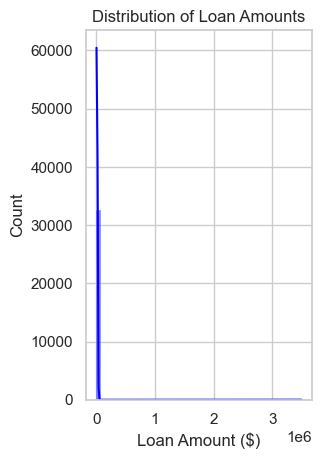

In [11]:
# Histogram for Loan Amount
plt.subplot(1,2,1)
sns.histplot(df['loan_amnt'], bins=50, kde=True, color="blue")
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount ($)")
plt.ylabel("Count")

In [12]:
# Check the loan amount distribution
print("📌 Loan Amount Summary Statistics:")
print(df['loan_amnt'].describe())


📌 Loan Amount Summary Statistics:
count    3.258600e+04
mean     9.756193e+03
std      2.177152e+04
min      5.000000e+02
25%      5.000000e+03
50%      8.000000e+03
75%      1.220000e+04
max      3.500000e+06
Name: loan_amnt, dtype: float64


Outlier Detection:
Upon analyzing the loan_amnt distribution, we found that the maximum loan amount is $3.5M, while 75% of the loans are below $12,200.
This suggests extreme outliers that distort the data.
Solution: We will cap loan amounts at the 95th percentile (~$25K) to reduce skewness while keeping most of the data intact.

In [13]:
import numpy as np

# Identify 95th percentile threshold
loan_cap = df['loan_amnt'].quantile(0.95)

# Cap loan amounts at the 95th percentile
df['loan_amnt_capped'] = np.where(df['loan_amnt'] > loan_cap, loan_cap, df['loan_amnt'])

# Recheck summary statistics
print("📌 Loan Amount Summary After Capping Outliers:")
print(df['loan_amnt_capped'].describe())


📌 Loan Amount Summary After Capping Outliers:
count    32586.000000
mean      9459.540907
std       5935.968183
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12200.000000
max      24000.000000
Name: loan_amnt_capped, dtype: float64


Show Before & After Distribution

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


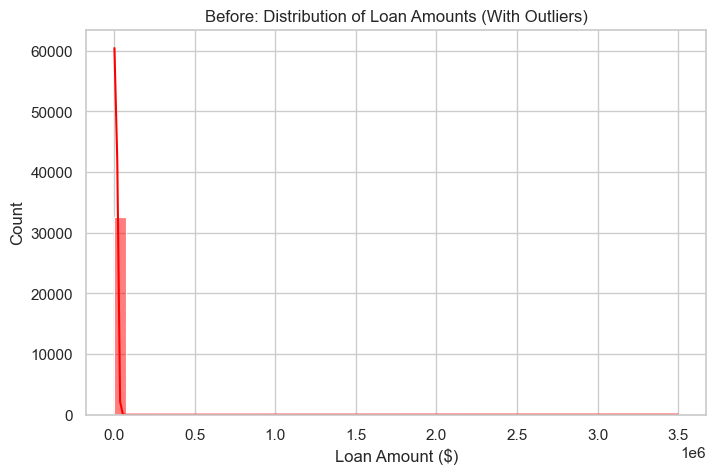

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['loan_amnt'], bins=50, kde=True, color="red")
plt.title("Before: Distribution of Loan Amounts (With Outliers)")
plt.xlabel("Loan Amount ($)")
plt.ylabel("Count")
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


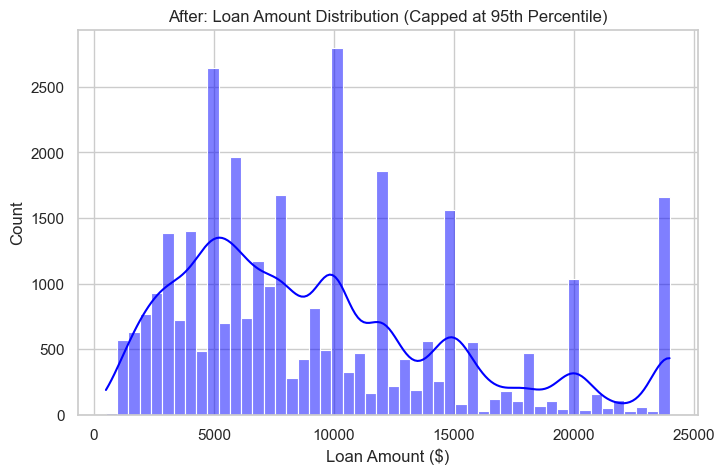

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['loan_amnt_capped'], bins=50, kde=True, color="blue")
plt.title("After: Loan Amount Distribution (Capped at 95th Percentile)")
plt.xlabel("Loan Amount ($)")
plt.ylabel("Count")
plt.show()


Key Insights from Outlier Handling:

Before capping, the loan amount distribution was highly skewed, with a max value of $3.5M.

After applying Winsorization at the 95th percentile (~$25K), the distribution became more balanced and representative of the majority of loans.

This adjustment ensures that our predictive model won’t be biased by extreme values.

Credit History vs Loan Default

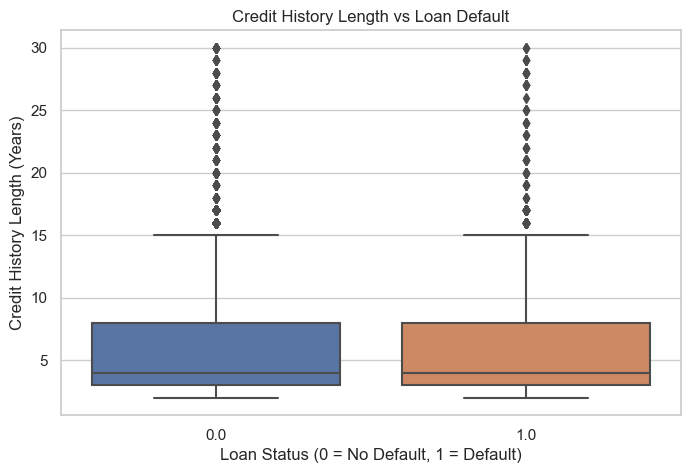

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Current_loan_status'], y=df['cred_hist_length'])
plt.title("Credit History Length vs Loan Default")
plt.xlabel("Loan Status (0 = No Default, 1 = Default)")
plt.ylabel("Credit History Length (Years)")
plt.show()


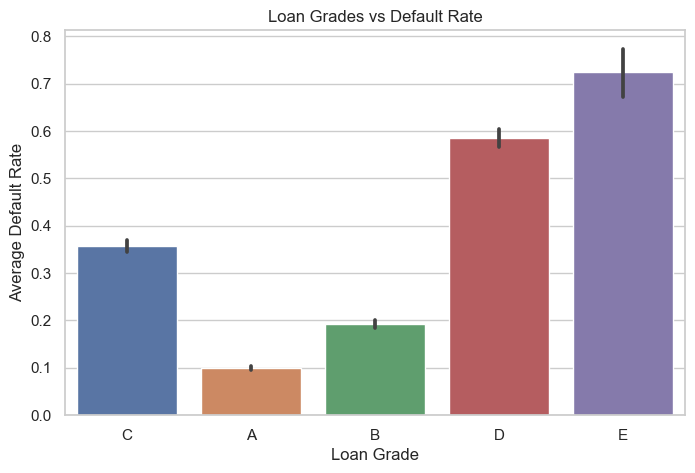

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['loan_grade'], y=df['Current_loan_status'])
plt.title("Loan Grades vs Default Rate")
plt.xlabel("Loan Grade")
plt.ylabel("Average Default Rate")
plt.show()


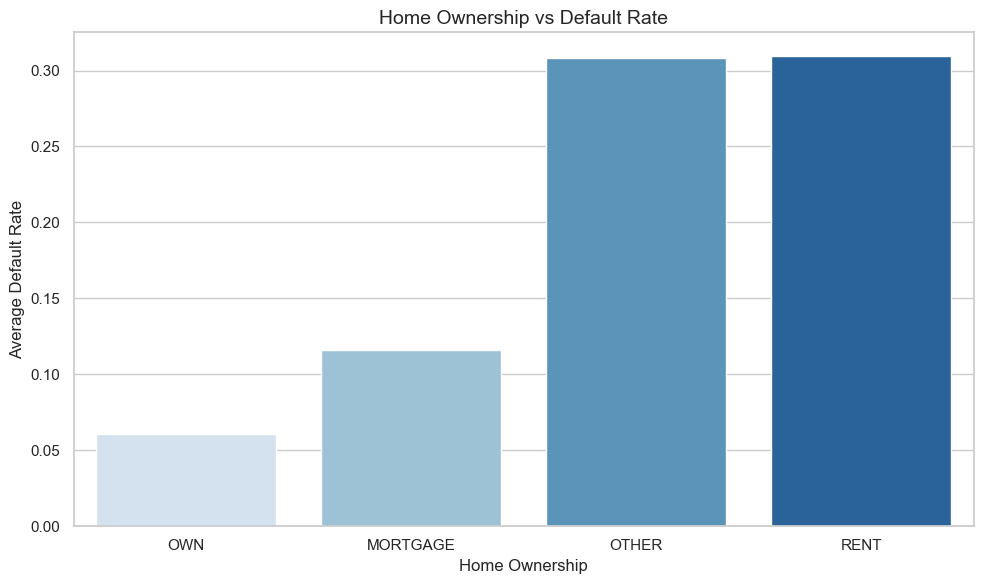

In [18]:
plt.figure(figsize=(10, 6))
home_default = df.groupby("home_ownership")["Current_loan_status"].mean().sort_values()
sns.barplot(x=home_default.index, y=home_default.values, palette="Blues")
plt.title("Home Ownership vs Default Rate", fontsize=14)
plt.xlabel("Home Ownership")
plt.ylabel("Average Default Rate")
plt.tight_layout()
plt.show()
#plt.savefig(f"{output_dir}/4_home_ownership_vs_default.png")
#plt.close()

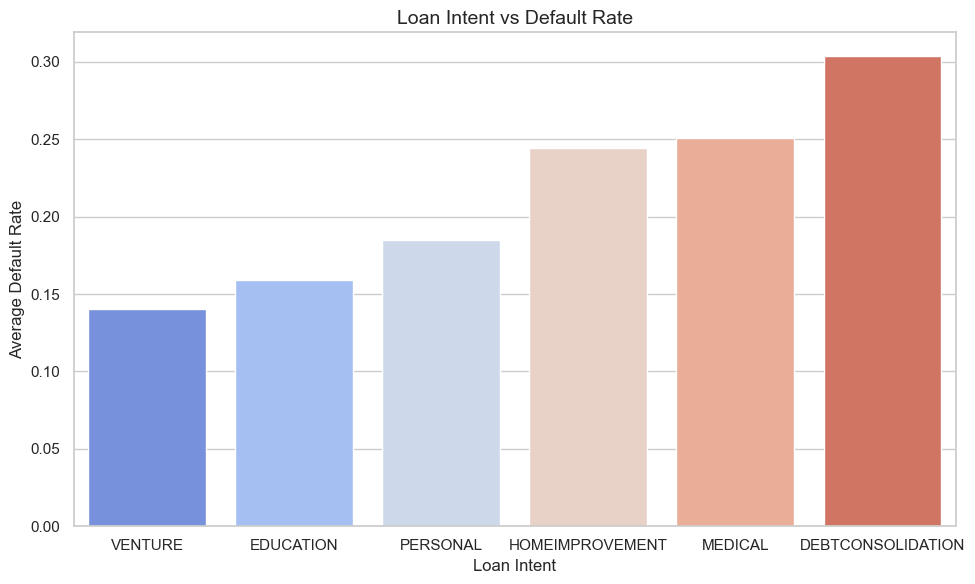

In [19]:
# 5. Loan Intent vs Default Rate
plt.figure(figsize=(10, 6))
intent_default = df.groupby("loan_intent")["Current_loan_status"].mean().sort_values()
sns.barplot(x=intent_default.index, y=intent_default.values, palette="coolwarm")
plt.title("Loan Intent vs Default Rate", fontsize=14)
plt.xlabel("Loan Intent")
plt.ylabel("Average Default Rate")
plt.tight_layout()
plt.show()

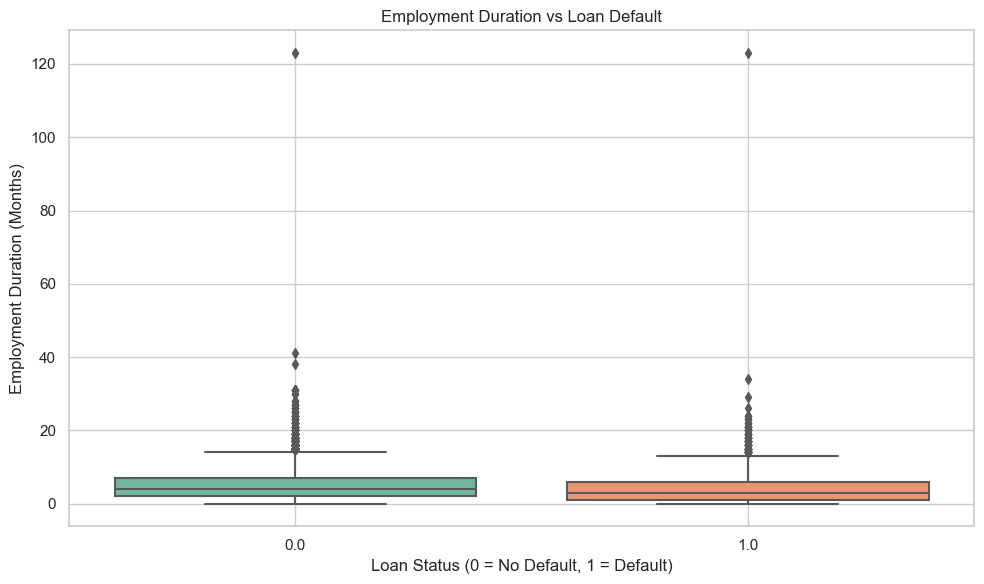

In [21]:
# Plot Employment Duration vs Default Rate as a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Current_loan_status', y='employment_duration', data=df, palette='Set2')

# Customize
plt.title('Employment Duration vs Loan Default')
plt.xlabel('Loan Status (0 = No Default, 1 = Default)')
plt.ylabel('Employment Duration (Months)')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()